# Fake News Detection

## Exploratory data analysis 

**Project Description**

The spread of fake news has become a major concern in today’s society, and it is important to be able to identify news articles that are not based on facts or are intentionally misleading. In this project, we will use machine learning to classify news articles as either real or fake based on their content. By identifying fake news articles, we can prevent the spread of misinformation and help people make more informed decisions.

This project is relevant to the media industry, news outlets, and social media platforms that are responsible for sharing news articles. Classifying news articles as real or fake can help these organizations improve their content moderation and reduce the spread of fake news.

**Problem Statement**

This project aims to classify news articles as real or fake based on their content. Specifically, we will use machine learning to build a model to predict whether a given news article is real or fake based on its text.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob

### Loading the dataset

In [2]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\project presentation\Dataset\train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


__Dataset Description__ 

* id: unique id for a news article 

* title: the title of a news article 

* author: author of the news article 

* text: the text of the article could be incomplete 

* label: a label that marks the article as potentially unreliable 

    * 1: unreliable (fake) 
    * 0: reliable (real) 

In [3]:
df = data.copy()

In [4]:
df = df.drop('id',axis=1)

### Understanding the Data

In [5]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [6]:
df.shape

(20800, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [8]:
df.describe()

,label
count,20800.000000
mean,0.500625
std,0.500012
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
df['title'].fillna('  ', inplace=True)
df['author'].fillna('Unknown', inplace=True)
df['text'].fillna('  ', inplace=True)

### Target Variable Distribution

In [11]:
# colour combination
custom_palette = ["#33A1FF","#FF5733"] 
sns.set_palette(custom_palette)

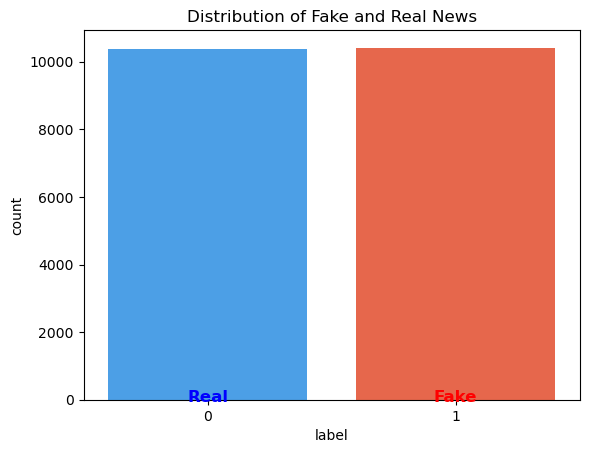

In [12]:
# Countplot
sns.countplot(x='label', data=df)
plt.text(1, -50, 'Fake', fontsize=12, color='red', fontweight='bold', ha='center')
plt.text(0, -50, 'Real', fontsize=12, color='blue', fontweight='bold', ha='center')
plt.title('Distribution of Fake and Real News')
plt.show()

In [13]:
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']
print(label_counts)

   Label  Count
0      1  10413
1      0  10387


In [14]:
df.nunique()

title     19804
author     4202
text      20386
label         2
dtype: int64

__Number of fake news = 10413__  
__Number of real news = 10387__

### Source Analysis

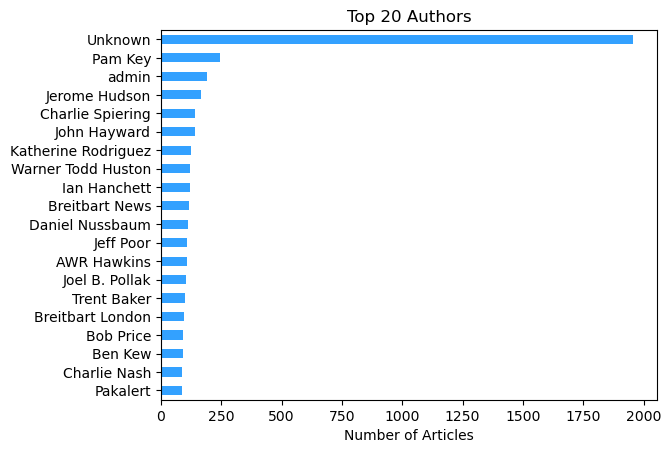

In [15]:
#Authors(Top 20):
df['author'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 20 Authors')
plt.xlabel('Number of Articles')
plt.show()

In [16]:
df['author'].value_counts()

Unknown                                      1957
Pam Key                                       243
admin                                         193
Jerome Hudson                                 166
Charlie Spiering                              141
                                             ... 
Jeremy R. Hammond                               1
Vic Bishop                                      1
Douglas Martin                                  1
Najim Rahim and Fahim Abed                      1
Michael J. de la Merced and Rachel Abrams       1
Name: author, Length: 4202, dtype: int64

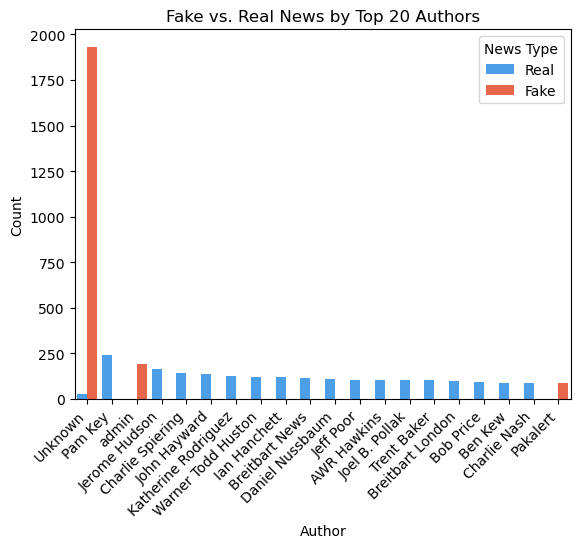

In [17]:
#Bar Plot of Target Labels vs. Authors(Top 20):
ax = sns.countplot(x='author', hue='label', data=df , palette=custom_palette, order=df['author'].value_counts().iloc[:20].index)

plt.title('Fake vs. Real News by Top 20 Authors')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

ax.legend(labels=['Real','Fake'], title='News Type')

plt.show()

### Text Analysis

In [18]:
df1 = df.copy()
df1['label'] = df1['label'].replace({0: 'Real', 1: 'Fake'})
df1.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,Real
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake


In [19]:
# Analyzing the length of news titles and news text
df1['title_length'] = df1['title'].apply(lambda x: len(str(x)))
df1['text_length'] = df1['text'].apply(lambda x: len(str(x)))
df1.head()

,title,author,text,label,title_length,text_length
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake,81,4930
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,Real,55,4160
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake,33,7692
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake,63,3237
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake,93,938


In [20]:
df1.describe()

,title_length,text_length
count,20800.000000,20800.000000
mean,72.379231,4544.182788
std,25.663810,5129.530465
min,2.000000,1.000000
25%,59.000000,1619.000000
50%,75.000000,3352.000000
75%,87.000000,6265.500000
max,456.000000,142961.000000


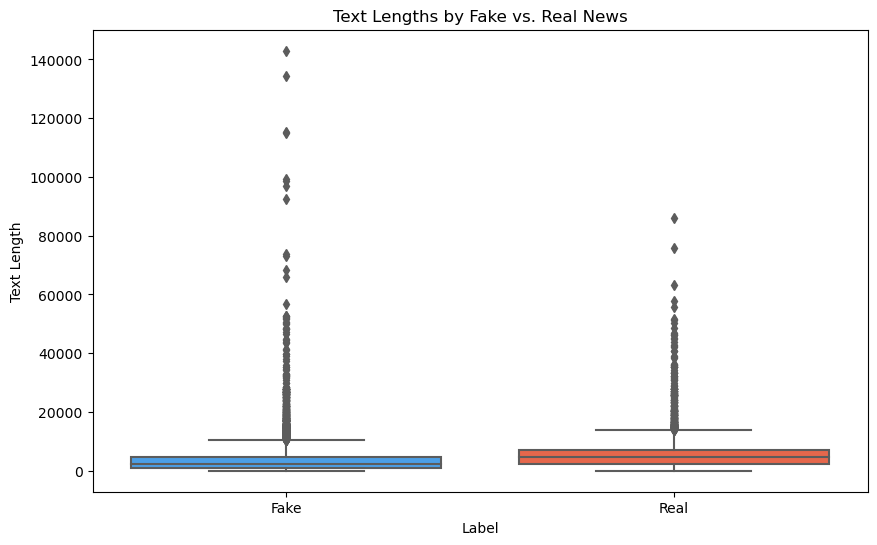

In [21]:
# Box plot of text lengths by target labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', palette=custom_palette, data=df1)
plt.title('Text Lengths by Fake vs. Real News')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

__Conclusion__  
Fake news articles tend to be longer than real news articles, on average. However, there is a significant overlap between the two distributions, so text length alone is not a reliable indicator of whether a news article is fake or real. There is a wider range of text lengths for fake news articles than for real news articles. This suggests that there is more variability in the length of fake news articles, while real news articles tend to be more consistent in length. Some fake news articles are very long, much longer than any of the real news articles. This suggests that some fake news articles are deliberately designed to appear more credible by being longer and more detailed.  
 
Overall, the image suggests that text length is not a reliable indicator of whether a news article is fake or real. However, it may be one of several factors that can be used to help identify fake news.

## Preprocessing

In [22]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
train = data.copy()

In [25]:
print(train.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [26]:
train=train.fillna(' ')

In [27]:
print(train.isnull().sum())

id        0
title     0
author    0
text      0
label     0
dtype: int64


In [28]:
train['total']=train['title']+' '+train['author']+train['text']

In [29]:
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()

In [30]:
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence

In [31]:
train = train[['total','label']]

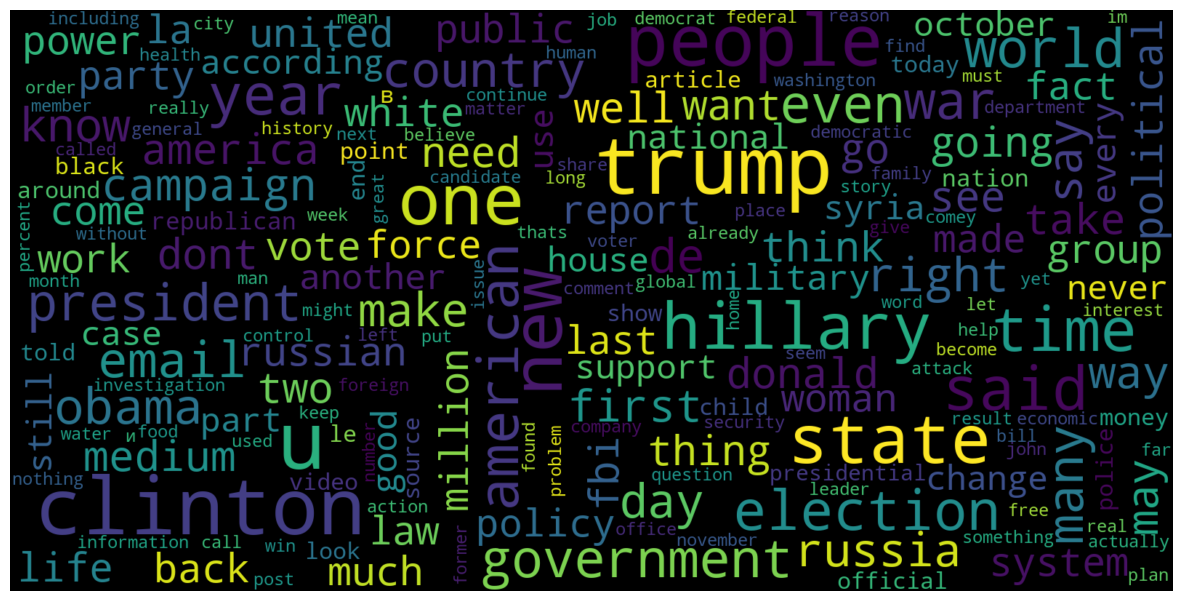

In [32]:
# Fake
from wordcloud import WordCloud
consolidated = ' '.join(
    word for word in train['total'][train['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

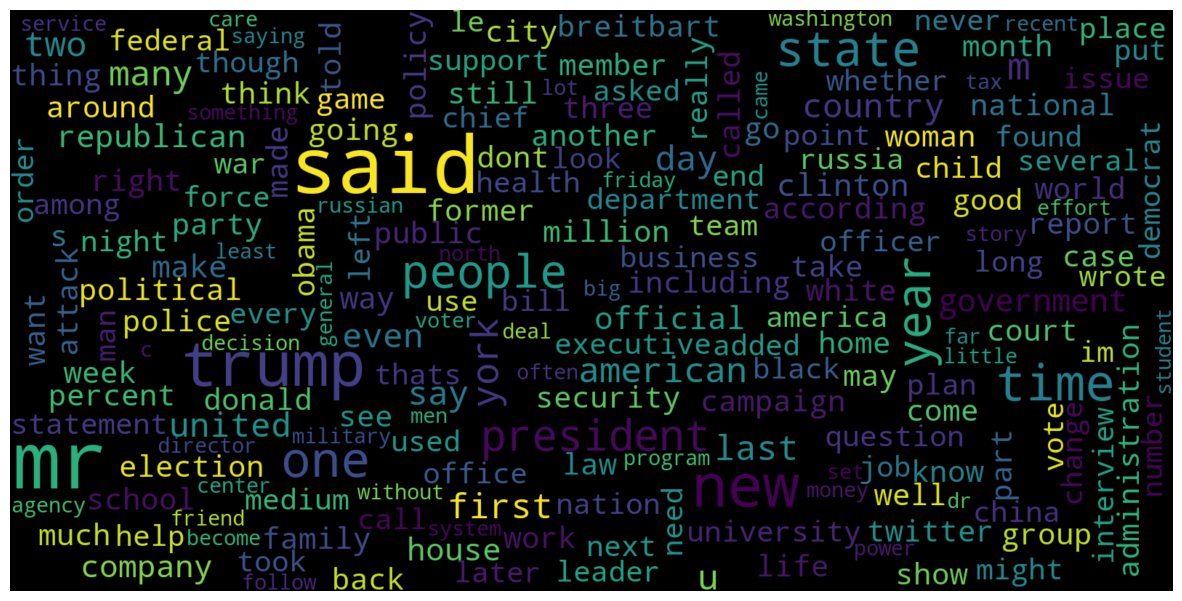

In [33]:
# Real
consolidated = ' '.join(
    word for word in train['total'][train['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

label
0    10387
1    10413
Name: total, dtype: int64


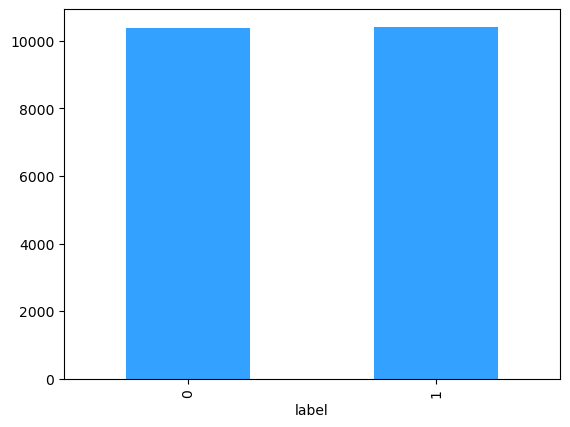

In [34]:
print(train.groupby(['label'])['total'].count())
train.groupby(['label'])['total'].count().plot(kind="bar")
plt.show()

## NLP

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
X_train = train['total']
Y_train = train['label']

In [37]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [38]:
tf_idf_matrix

<20800x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 5987666 stored elements in Compressed Sparse Row format>

## Finding The Best Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [43]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [44]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

In [45]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(report)
    print(f"{name} Confusion Matrix:")
    print(matrix)

Logistic Regression Accuracy: 0.9602
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2564
           1       0.96      0.97      0.96      2636

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200

Logistic Regression Confusion Matrix:
[[2444  120]
 [  87 2549]]
Decision Tree Accuracy: 0.9675
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2564
           1       0.96      0.97      0.97      2636

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200

Decision Tree Confusion Matrix:
[[2463  101]
 [  68 2568]]
Random Forest Accuracy: 0.9377
Random Forest Classification Report:
      

Based on the classification results and confusion matrices obtained for different machine learning models, we can draw the following conclusions:

1. Logistic Regression: Achieved an accuracy of 96.02%. It performed well in terms of precision, recall, and F1-score for both classes. The confusion matrix indicates that it had a slightly higher number of false negatives compared to false positives.  

2. Decision Tree: Achieved an accuracy of 96.75%. Similar to logistic regression, it performed well in terms of precision, recall, and F1-score for both classes. The confusion matrix shows a balanced performance with relatively few misclassifications.  

3. Random Forest: Achieved an accuracy of 93.77%. While still performing well, it had a slightly lower accuracy compared to logistic regression and decision tree classifiers. The confusion matrix indicates a higher number of false positives compared to false negatives.  

4. K-Nearest Neighbors (KNN): Achieved an accuracy of 85.62%. It had the lowest accuracy among the models evaluated. The confusion matrix shows a higher number of misclassifications, especially false positives.  

5. Support Vector Machine (SVM): Achieved the highest accuracy of 97.33%. It outperformed other models in terms of accuracy and showed balanced precision, recall, and F1-score for both classes. The confusion matrix indicates a balanced performance with very few misclassifications.  

Conclusion:
Based on the evaluation metrics and confusion matrices, the Support Vector Machine (SVM) model appears to be the best-performing classifier for this dataset, achieving the highest accuracy and demonstrating balanced performance in terms of precision, recall, and F1-score for both classes. Therefore, the SVM model can be considered the most suitable for classifying news articles as real or fake in this context.

## Hyperparameter tuning

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer

### Logistic Regression Hyperparameter Tuning

In [47]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [1000000, 100000, 10000, 1000]

In [50]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [52]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

In [53]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.975919 using {'C': 10000, 'penalty': 'l2', 'solver': 'liblinear'}


####  Conclusion 

It appears that hyperparameter tuning has significantly improved the accuracy of the Logistic Regression model from 96.02% to 97.59%. This improvement is quite substantial and demonstrates the effectiveness of fine-tuning model parameters.  

The Logistic Regression model initially exhibited high accuracy, and with further tuning, it managed to achieve an even better performance. This indicates that there was significant room for optimization through hyperparameter tuning.  

The hyperparameter tuning of other models are complex and not giving any results so logistic regression is used for model training.